In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import cv2

import functions as fn

In [2]:
dataDir='../data'
trainDir='train2017'
valDir='val2017'

trainAnn=f'{dataDir}/annotations/instances_{trainDir}.json'
valAnn=f'{dataDir}/annotations/instances_{valDir}.json'

cocoTrain=COCO(trainAnn)
cocoVal=COCO(valAnn)

loading annotations into memory...
Done (t=9.77s)
creating index...
index created!
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


In [3]:
catIds = cocoTrain.getCatIds(catNms=['person'])
imgIds = cocoTrain.getImgIds(catIds=catIds)
imgIds = cocoTrain.getImgIds(imgIds=imgIds)

In [4]:
img = {'license': 3,
 'file_name': '000000102771.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000102771.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-16 21:36:01',
 'flickr_url': 'http://farm4.staticflickr.com/3141/3060074174_c540b56d2e_z.jpg',
 'id': 102771}

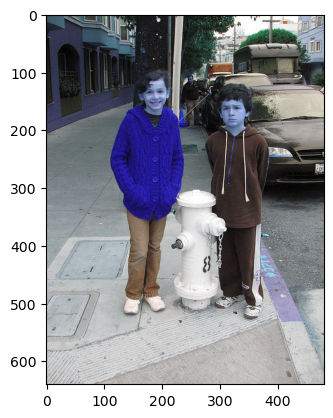

In [24]:
fpath = '{}/{}/{}'.format(dataDir, trainDir, img['file_name'])

test_img = cv2.imread(fpath, -1)

plt.imshow(test_img)

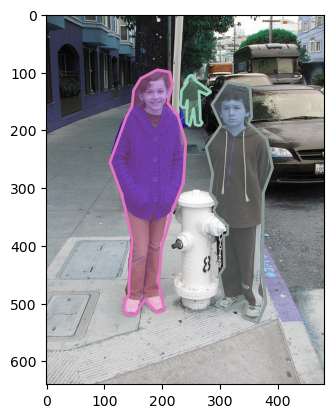

In [21]:
plt.imshow(test_img)

anns_ids = cocoTrain.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = cocoTrain.loadAnns(anns_ids)
cocoTrain.showAnns(anns)

In [23]:
test_masked_img, test_masked_img_inv = fn.generate_masked_images(test_img, anns[0])

fn.display_image(test_masked_img, window_name='Masked')

In [18]:
fn.display_image(test_masked_img_inv, window_name='Inverse masked')

In [9]:
fn.display_image(test_img, window_name='Original')

In [28]:
img = test_img
ann = anns[0]

mask = np.ones(img.shape, dtype=np.uint8) * 255
roi_corners = fn.coco_polyseg_formatted(ann)
channel_count = img.shape[2]
ignore_mask_color = 0
cv2.fillConvexPoly(mask, roi_corners, ignore_mask_color)
fn.display_image(cv2.bitwise_and(img, mask))

In [25]:
#mask = np.ones(img.shape, dtype=np.uint8) * 255
#fn.display_image(mask)

In [19]:
#anns[0]['segmentation']

In [14]:
fn.coco_polyseg_formatted(anns[0])

array([[142, 485],
       [142, 461],
       [147, 389],
       [134, 327],
       [128, 307],
       [109, 255],
       [138, 175],
       [147, 157],
       [150, 130],
       [162, 109],
       [191,  94],
       [213,  98],
       [217, 120],
       [209, 152],
       [227, 174],
       [241, 220],
       [236, 290],
       [214, 345],
       [213, 355],
       [198, 404],
       [194, 463],
       [201, 498],
       [204, 511],
       [190, 515],
       [169, 493],
       [153, 519],
       [134, 518],
       [134, 492]])